In [55]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from figs import get_assignments

In [7]:
samples = pd.read_csv('samples.csv')

In [38]:
weights = samples[[c for c in samples.columns if 'w' in c]].mean()
var_param = samples[[c for c in samples.columns if 'var_param' in c]].mean()
temp = samples[[c for c in samples.columns if 'temp' in c]].mean()

methods = pd.DataFrame(samples[[c for c in samples.columns if 'method' in c]].mean())
methods['c'] = methods.index.map(lambda x: x.split('_')[2])
methods['method'] = methods.index.map(lambda x: x.split('_')[3])
methods = methods.pivot(index='c', columns='method', values=0)

In [39]:
weights

w__0    0.415958
w__1    0.243484
w__2    0.161772
w__3    0.100607
w__4    0.038547
dtype: float64

In [40]:
methods

method,0,1,2
c,,,
0,0.725337,0.126642,0.148021
1,0.583498,0.277266,0.139236
2,0.661282,0.168616,0.170102
3,0.332391,0.297189,0.370419
4,0.257547,0.405748,0.336705


In [42]:
var_param

var_param__0    0.578060
var_param__1    1.044639
var_param__2    1.113315
var_param__3    1.930068
var_param__4    1.191849
dtype: float64

In [43]:
temp

temperature__0    0.004495
temperature__1    0.105281
temperature__2    0.081546
temperature__3    0.135147
temperature__4    0.118293
dtype: float64

In [45]:
with open('vectorized_responses.pkl', 'rb') as f:
    responses = pickle.load(f)

In [46]:
responses.shape

(69, 25, 11, 80)

In [51]:
actions = responses[:,:,-1,:].argmax(axis=2)

In [59]:
assignments = get_assignments(samples)
max_assignments = assignments.idxmax()

In [87]:
clusters = sorted(max_assignments.unique())

UCB: 0.73 beta: 0.58
MES: 0.13
Random: 0.15


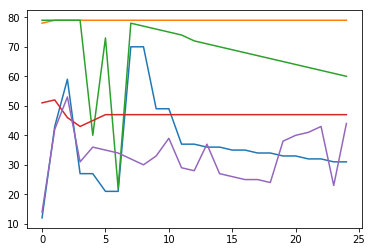

UCB: 0.58 beta: 1.04
MES: 0.28
Random: 0.14


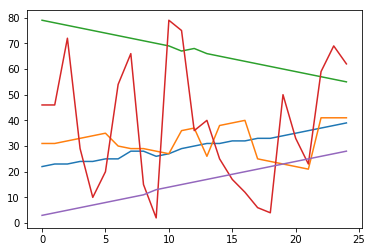

UCB: 0.66 beta: 1.11
MES: 0.17
Random: 0.17


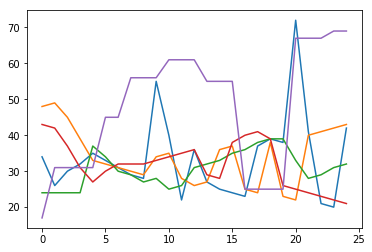

UCB: 0.33 beta: 1.93
MES: 0.3
Random: 0.37


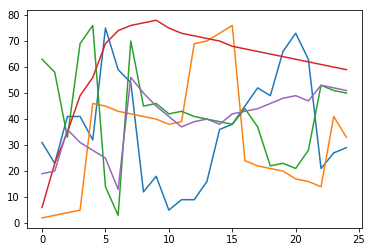

In [105]:
for cluster in clusters:
    
    ucb, mes, rand = methods.loc[str(cluster)]
    param = var_param.loc['var_param__'+str(cluster)]
    
    print ('UCB: ' + str(np.round(ucb,2)), 'beta: ' + str(np.round(param,2)))
    print ('MES: ' + str(np.round(mes,2)))
    print ('Random: ' + str(np.round(rand,2)))
    idx = max_assignments[max_assignments==cluster].index.map(lambda x: int(x.split('__')[1])).values
    cluster_actions = actions[idx]
    plt.plot(cluster_actions[:5].T)
    plt.show()
    